In [1]:
from IPython.core.display import Latex
import pandas as pd
import pathlib

Num of Munich: 719
Num of Berlin: 748
Num of Hamburg: 665
Sum of Berlin+München+Hamburg 2132 wrt total Germany 23396
Percentage of Berlin, München, Hamburg 9.112668832279022
Last date Update 2021-11-01 00:00:00
First EV charging station: 1999-12-31 00:00:00
First ultra-rapid charging station: 2012-06-16 00:00:00
city                Berlin  Hamburg  München  Köln  Frankfurt am Main  \
commissioning_date                                                      
1999                   NaN      NaN      NaN   NaN                NaN   
2007                   NaN      NaN      NaN   NaN                NaN   
2008                   NaN      NaN      NaN   NaN                NaN   
2009                  25.0      NaN      NaN   1.0                4.0   
2010                  14.0      1.0      NaN   NaN                1.0   
2011                  25.0      NaN      1.0   3.0                1.0   
2012                  24.0      NaN      NaN   NaN                NaN   
2013                   NaN   

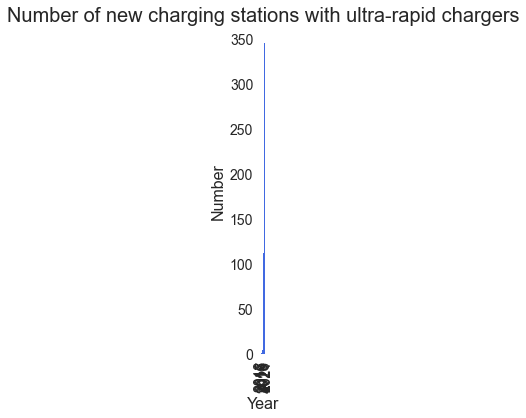

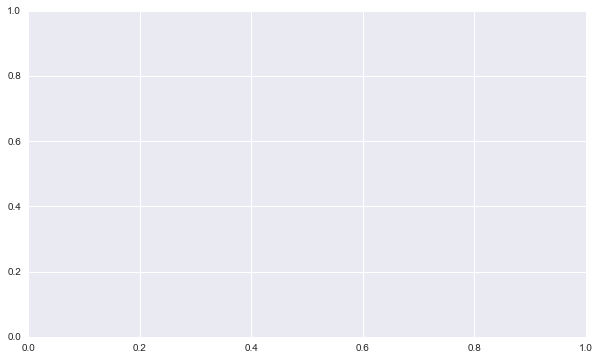

In [2]:
# load the csv file into a pandas data frame
df_mobility = pd.read_csv('../Data/Ladesaeulenregister_CSV.csv', encoding='latin_1', sep=';', skiprows=5)
# CP850

#print(df_mobility)

# print('Hello, world!')

# translate columns into english 
old_names = df_mobility.columns.tolist()

new_names = ['operator', 'address', 'house_number', 'placeholder1', 'postcode', 'city', 'federal_state', 'metropolitan_area', 
                'latitude_[dg]', 'longitude_[dg]', 'commissioning_date',
                'power_connection_[kw]', 'type_of_charger', 'number_of_charging_points','type_of_plug_1', 'p1_[kw]', 
             'public_key1', 'type_of_plug_2', 'p2_[kw]', 'public_key2', 'type_of_plug_3', 'p3_[kw]', 'public_key3',
             'type_of_plug_4', 'p4_[kw]', 'public_key4']

df_mobility.rename(columns=dict(zip(old_names, new_names)), inplace=True)

# unique elements of the column type_of_charger
df_mobility.type_of_charger.unique()
# array(['Schnellladeeinrichtung', 'Normalladeeinrichtung'], dtype=object)

# modify entries of the column type_of_charger
df_mobility.type_of_charger.replace({'Schnellladeeinrichtung': 'fast', 'Normalladeeinrichtung': 'normal'}, inplace=True)

# basic summary of the data frame
# df_mobility.info()

# replace null values by 0
columns_na = ['type_of_plug_2', 'p2_[kw]', 'type_of_plug_3', 'p3_[kw]', 'type_of_plug_4', 'p4_[kw]']

for column in columns_na:
    df_mobility[column] = df_mobility[column].fillna(value='0')

# drop public key columns
df_mobility.drop(columns=['public_key1', 'public_key2', 'public_key3', 'public_key4'], inplace=True)

# check if there are null values
df_mobility.isnull().sum().sum()
# 0

# basic summary of the data frame
# df_mobility.info()

# convert the data type of these columns to float
columns_modify =  ['longitude_[dg]', 'latitude_[dg]', 'power_connection_[kw]', 'p1_[kw]', 'p2_[kw]', 'p3_[kw]', 'p4_[kw]']

for column in columns_modify: 
    df_mobility[column] = df_mobility[column].str.replace(',','.').astype('float')

# convert the column commissioning_date to datetime
df_mobility['commissioning_date'] = pd.to_datetime(df_mobility['commissioning_date'], format='%d.%m.%Y')

# check that inappropriate data types and null values were correctly modified
# df_mobility.info()

# there are city names with leading or trailing spaces
df_mobility.city[df_mobility.city.str.startswith(' ') | df_mobility.city.str.endswith(' ')].unique()

# names of columns of type object
columns_object = df_mobility.select_dtypes(include='object').columns

# remove leading and trailing spaces of columns of type object using the string method strip
for column in columns_object:
    df_mobility[column] = df_mobility[column].str.strip()

# check that leading and trailing spaces of the column city were correctly removed
(df_mobility.city.str.startswith(' ') | df_mobility.city.str.endswith(' ')).any()
# False

# series containing city names
cities = df_mobility.city

# discover wrong city names using the contains method
cities[cities.str.contains('Frankfurt')].unique()
# array(['Frankfurt (Oder)', 'Frankfurt/Oder', 'Frankfurt',
#        'Frankfurt am Main', 'Frankfurt-Niederrad'], dtype=object)

cities[cities.str.contains('Stuttgart')].unique()
# array(['Stuttgart', 'Stuttgart-Obertürkheim', 'Stuttgart-Mühlhausen',
#        'Stuttgart-Möhringen'], dtype=object)

cities[cities.str.contains('München')].unique()
# array(['Stuttgart', 'Stuttgart-Obertürkheim', 'Stuttgart-Mühlhausen',
#        'Stuttgart-Möhringen'], dtype=object)


# cities_modification2={'M¸nchen': 'München'}
# df_mobility.city.replace(cities_modification2, inplace=True)

# map wrong names to correct denominations
cities_modification = {'Hamburg-Wandsbeck': 'Hamburg', 'Hamburg-Duvenstedt': 'Hamburg', 'Berlin-Köpenick': 'Berlin',
                       'Berlin-Friedrichsfelde': 'Berlin', 'Berlin-Reinickendorf': 'Berlin', 'Köln-Niehl': 'Köln',
                       'Köln-Merheim': 'Köln', 'Frankfurt': 'Frankfurt am Main', 'Frankfurt-Niederrad': 'Frankfurt am Main',
                       'Stuttgart-Obertürkheim': 'Stuttgart', 'Stuttgart-Mühlhausen': 'Stuttgart', 'Stuttgart-Möhringen': 'Stuttgart',
                       'Leipzig-Gohlis': 'Leipzig', 'Essen-Kettwig': 'Essen', 'Bremen-Vahr': 'Bremen', 'Dresden Gabitz': 'Dresden',
                       'Dresden Striesen': 'Dresden', 'Regensburg-Schwabelweis': 'Regensburg', 'Wuppertal Vohwinkel': 'Wuppertal', 
                       'Garching b. München': 'München', 'München - Neufriedenheim': 'München', 'München Flughafen': 'München', 
                       'München Nord': 'München', 'München Sendling': 'München', 'München-Flughafen': 'München', 
                       'München-Freiham': 'München', 'Puchheim b. München': 'München'}
# replace wrong values
df_mobility.city.replace(cities_modification, inplace=True)

# check that the modification was carried out correctly
cities[cities.str.contains('Stuttgart')].unique()
cities[cities.str.contains('München')].unique()
cities[cities.str.contains('Berlin')].unique()
# array(['Stuttgart'], dtype=object)

# number of duplicated rows
df_mobility.duplicated().sum()
# 1001

import matplotlib.pyplot as plt

# matplotlib inline
plt.style.use('seaborn')

# number of charging station per federal state
df_mobility.federal_state.value_counts().plot(kind='bar', color='green', figsize=(8,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# title and labels
plt.title('Number of charging stations by federal state', fontsize=20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Number', fontsize=16)

# plt.show()
plt.savefig('../Exploratory_Analysis_Graphs/EVperFederalState.png', bbox_inches='tight')
plt.cla()

# top 10 German cities with the most EV charging stations
df_mobility.city.value_counts().head(10).plot(kind='bar', color='blue', figsize=(8,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# title and labels
plt.title('Top 10 German cities with the most EV charging stations', fontsize=20)
plt.xlabel('City', fontsize=16)
plt.ylabel('Number', fontsize=16)

# plt.show()
plt.savefig('../Exploratory_Analysis_Graphs/Top10GermanCity.png', bbox_inches='tight')
plt.cla()

# number of charging stations located in Munich, Hamburg, or Berlin
# top_three = df_mobility.city.isin(['Berlin', 'München', 'Hamburg']).sum()
num_Munich=df_mobility.city.isin(['München']).sum()
num_Berlin=df_mobility.city.isin(['Berlin']).sum()
num_Hamburg=df_mobility.city.isin(['Hamburg']).sum()

top_three=num_Munich+num_Berlin+num_Hamburg
# number of charging stations in Germany
total = df_mobility.shape[0]

# percentage of charging stations located in Munich, Hamburg, or Berlin
perc=top_three/total*100
print('Num of Munich:', num_Munich)
print('Num of Berlin:', num_Berlin)
print('Num of Hamburg:', num_Hamburg)
print('Sum of Berlin+München+Hamburg', top_three, 'wrt total Germany', total)
print('Percentage of Berlin, München, Hamburg', perc)
# 9.11

# number of charging points of stations in Germany - pie chart
df_mobility['number_of_charging_points'].value_counts().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', fontsize=16)

# labels and title
plt.title('Number of charging points of stations in Germany', fontsize=20)
plt.ylabel('')

# plt.show()
plt.savefig('../Exploratory_Analysis_Graphs/ChargingPointNumber.png', bbox_inches='tight')
plt.cla()

# top 10 German cities with the most EV charging points
df_mobility.groupby('city').sum().number_of_charging_points.sort_values(ascending=False).head(10).plot(kind='bar', color='maroon', figsize=(8,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# title and labels
plt.title('Top 10 German cities with the most EV charging points',fontsize=20)
plt.xlabel('City',fontsize=16)
plt.ylabel('Number',fontsize=16)

# plt.show() ACHTUNG !!!!!!!!!!!!!!!
plt.savefig('../Exploratory_Analysis_Graphs/GermanCityPerChargingPoints.png', bbox_inches='tight')
plt.cla()

# number of new charging stations installed per year
df_mobility['commissioning_date'].dt.year.value_counts().sort_index().plot(kind='bar', color='darkblue')

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# title and labels
plt.title('Number of new charging stations installed per year',fontsize=20)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Number',fontsize=16)

# plt.show()
plt.savefig('../Exploratory_Analysis_Graphs/ImprovementEVChargingStationPerYear.png', bbox_inches='tight')
plt.cla()

# the last date recorded was May 5th 2020
print('Last date Update', df_mobility['commissioning_date'].max())
# Timestamp('2021-11-01 00:00:00')

p1, p2, p3, p4 = df_mobility['p1_[kw]'], df_mobility['p2_[kw]'], df_mobility['p3_[kw]'], df_mobility['p4_[kw]']

# serie that contains the power of all charging points in Germany
charging_points = pd.concat([p1, p2, p3, p4])

# remove entries equal to 0 
charging_points = charging_points[charging_points != 0]

# 10 most common power
most_common_power = charging_points.value_counts().head(10)

# print(most_common_power)

import numpy as np

# number of unique power outputs in Germany
charging_points.nunique()
# print('number of unique points', charging_points.nunique())
# 86

# unique power outputs sorted in ascending order 
np.sort(charging_points.unique())

#--------------------------------------------------------------------------------------------------------------------
# number of charging points with a power output different from 22, 11, 50, 43, 3.7, 350, 150, 42, 20, 53 (10 most common power outputs)
num_charging_points = charging_points.count()
other_power = num_charging_points - most_common_power.sum()

# include other in the most common power output serie
most_common_power.at['other'] = other_power

# define colors of the pie plot
colors = ['darkviolet', 'dodgerblue', 'yellow', 'deeppink', 'orange', 'skyblue', 'salmon', 'green', 'red', 'darkblue', 'springgreen']

# pie plot showing power output of charging points in Germany
most_common_power.plot(kind='pie', figsize=(8, 8), labels=None, colors=colors, fontsize=16)

# legend  - percentage of charging points 
labels = ['{} kW - {:.2%}'.format(index, most_common_power.loc[index]/num_charging_points) for index in most_common_power.index]
plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=18)

# labels and title
plt.title('Power output of charging points in Germany', fontsize=20)
plt.ylabel('')
# plt.show()
plt.savefig('../Exploratory_Analysis_Graphs/PowerOutputPiePercentage.png', bbox_inches='tight')
plt.cla()
#--------------------------------------------------------------------------------------------------------------------

# number of charging points of 300 kW in operation
(charging_points == 300.0).sum()
#print('Number of charging point 300kW:', (charging_points == 300.0).sum())
# 6 on May 2020
# 582 on Nov 2021

# number of charging points of 320 kW in operation 
(charging_points == 320.0).sum()
#print('Number of charging point 300kW:', (charging_points == 320.0).sum())
# 10 on May 2020
# 65 on Nov 2021

# number of charging points of 350 kW in operation 
(charging_points == 350.0).sum()
#print('Number of charging point 300kW:', (charging_points == 350.0).sum())
# 328 on May 2020
# 462 on Nov 2021

# charging stations with at least one ultra-rapid charging point (>300kW)
ultra_fast_stations = df_mobility[(df_mobility['p1_[kw]']>=300.0) | (df_mobility['p2_[kw]']>=300.0) | (df_mobility['p3_[kw]']>=300.0) | (df_mobility['p4_[kw]']>=300.0)]

# number of charging stations with at least one ultra-rapid charging point
# print('Number of ultra fast stations', len(ultra_fast_stations))
# 341 on May 2020
# 821 on November 2021

# number of charging station with ultra-rapid charger
ultra_fast_stations.federal_state.value_counts().plot(kind='bar', color='springgreen', figsize=(8,6))

# print(ultra_fast_stations)

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# title and labels
plt.title('Number of stations with ultra-rapid chargers', fontsize=20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Number', fontsize=16)

plt.savefig('../Exploratory_Analysis_Graphs/UltraRapidChargersPerLand.png', bbox_inches='tight')
plt.cla()
#--------------------------------------------------------------------------------------------------------------------

# number of new charging stations with ultra-rapid chargers
ultra_fast_stations['commissioning_date'].dt.year.value_counts().sort_index().plot(kind='bar', color='royalblue')

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# title and labels
plt.title('Number of new charging stations with ultra-rapid chargers', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number', fontsize=16)

# plt.show()
################## ACHTUNG
#--------------------------------------------------------------------------------------------------------------------

# first electric vehicle charging station in Germany
print('First EV charging station:', df_mobility['commissioning_date'].min())
# Timestamp('1999-12-31 00:00:00')

# first charging station with an ultra-rapid charging point (>300kW) in Germany.
print('First ultra-rapid charging station:', ultra_fast_stations['commissioning_date'].min())
# Timestamp('2012-06-16 00:00:00')

#--------------------------------------------------------------------------------------------------------------------

# the most populated cities in Germany
biggest_cities = ['Berlin', 'Hamburg', 'München', 'Köln', 'Frankfurt am Main', 'Stuttgart', 'Düsseldorf', 'Dortmund', 'Essen', 'Leipzig']

# group by date and city
date_city_group_by = df_mobility.groupby([df_mobility['commissioning_date'].dt.year, 'city']).count()

# select a column and move the innermost level of the index to the columns
date_cities = date_city_group_by.operator.unstack()

# select the most populated cities in germany
date_cities_10 = date_cities[biggest_cities]

# Number of EV charging station per year and biggest cities --> un-comment if you need
print(date_cities_10)

# define the colors for the line plot
colors = ['darkviolet', 'dodgerblue', 'yellow', 'deeppink', 'orange', 'skyblue', 'salmon', 'green', 'red', 'darkblue', 'springgreen']

# line plot showing the total number of EV charging station in operation over the years
date_cities_10.fillna(0.0).cumsum().plot(color=colors, marker='o', alpha=0.7, linewidth=3, figsize=(10,6))

# modify the ticks and the legend
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

# define the title and the labels
plt.title('Total number of EV charging stations in operation', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number', fontsize=16)
plt.xlim([2007, 2022])

plt.savefig('../Exploratory_Analysis_Graphs/EVchargingEvolutionPerYearAndCity.png', bbox_inches='tight')
plt.cla()

#--------------------------------------------------------------------------------------------------------------------

import folium 
from IPython.display import display

LDN_COORDINATES=(48.137154, 11.576124)
# define a map centered around Munich
munich_map = folium.Map(LDN_COORDINATES, zoom_start=12)

# display the map
munich_map.save('../Exploratory_Analysis_Graphs/munichmap.html')

# data frame containing only the charging stations located in Munich
df_munich = df_mobility[df_mobility['city'] == 'München']

# create a map object of the city of Munich
munich_map_markers = folium.Map(location=[48.137154, 11.576124], zoom_start=12)

# display charging stations using circle markers

for lat, lng in zip(df_munich['latitude_[dg]'], df_munich['longitude_[dg]']):
    folium.CircleMarker(
            [lat, lng],
            radius=9,
            color='purple',
            opacity=0.4,
            fill=True,
            fill_color='blue').add_to(munich_map_markers) 


munich_map_markers.save('../Exploratory_Analysis_Graphs/munichmapEV.html')

In [16]:
df_mobility.groupby('city').sum().number_of_charging_points.sort_values(ascending=False).head(10)

wolf=df_mobility[df_mobility['city']=='Wolfsburg']

print(wolf)

                      operator                    address house_number  \
12894              Allego GmbH                Westerlinge            8   
12895        VW Kraftwerk GmbH              Berliner Ring            2   
12896  Stadtwerke Wolfsburg AG              Rathausstraße            0   
12897  Stadtwerke Wolfsburg AG            Otto-Wels-Platz            0   
12898  Stadtwerke Wolfsburg AG                 Poststraße           40   
...                        ...                        ...          ...   
13335              IONITY GmbH                  Allerpark            0   
13336              IONITY GmbH                  Allerpark            0   
13337              IONITY GmbH                  Allerpark            0   
13338     Schubert Motors GmbH  Karl-Ferdinand-Braun-Ring            1   
13339      Koller GmbH u.CO kG           Wolfsburger Str.           22   

      placeholder1  postcode       city  federal_state  \
12894          NaN     38422  Wolfsburg  Niedersachse

In [3]:
import networkx as nx
from datetime import datetime

i=0
j=0
k=0
latdodici=[]
lgdodici=[]

latquindici=[]
lgquindici=[]

latall=[]
lgall=[]

posdodici={}
posquindici={}
posventuno={}

autonomia_auto=100
Mundodici=0
Berldodici=0
Dortdodici=0
Hambdodici=0

Munquindici=0
Berlquindici=0 
Dortquindici=0 
Hambquindici=0 

Munventuno=0
Berlventuno=0 
Dortventuno=0 
Hambventuno=0 

In [4]:
for lat, lng, temp in zip(df_mobility['latitude_[dg]'], df_mobility['longitude_[dg]'], df_mobility['commissioning_date']):
    t1=datetime.strptime(str(temp), "%Y-%m-%d %H:%M:%S")
    if t1.year<2013:
        i=i+1
        latdodici.append(lat)
        lgdodici.append(lng)
        posdodici[i]=(lng,lat)

    if t1.year<2016:
        j=j+1
        latquindici.append(lat)
        lgquindici.append(lng)
        posquindici[j]=(lng,lat)
    
    k=k+1
    latall.append(lat)
    lgall.append(lng)
    posventuno[k]=(lng,lat)

    if lat==52.535955 and lng==13.368842:
        Berldodici=i
        Berlquindici=j
        Berlventuno=k
        print("Anno di Berlino", t1.year)
    if lat==51.51055 and lng==7.469569:
        Dortdodici=i
        Dortquindici=j
        Dortventuno=k
        print("Anno di Dortmund", t1.year)
    if lat==53.548022 and lng==10.012778:
        Hambdodici=i
        Hambquindici=j
        Hambventuno=k
        print("Anno di Hamburg", t1.year)
    if lat==48.148119 and lng==11.465166:
        Mundodici=i
        Munquindici=j
        Munventuno=k
        print("Anno di Monaco", t1.year)

# print(latquindici[50])

print('Berlino15:', Berlquindici, ' e 21:', Berlventuno, 'e 12:', Berldodici)
print('München15:', Munquindici, ' e 21:', Munventuno, 'e 12:', Mundodici)
print('Hamb15:', Hambquindici, ' e 21:', Hambventuno, 'e 12', Hambdodici)
print('Dort15:', Dortquindici, ' e 21:', Dortventuno, 'e 12:', Dortdodici)

Anno di Monaco 2011
Anno di Berlino 2009
Anno di Hamburg 2010
Anno di Dortmund 2009
Berlino15: 387  e 21: 8723 e 12: 67
München15: 180  e 21: 4886 e 12: 36
Hamb15: 560  e 21: 10132 e 12 158
Dort15: 1213  e 21: 18174 e 12: 403


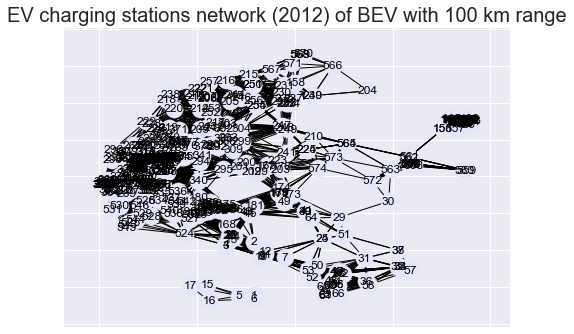

In [5]:
from math import sin,cos,sqrt,atan2,radians

Gdodici=np.zeros((i,i))
weightsdodici=np.zeros((i,i))

R = 6373.0 # planet radius

for a in range (1,i):
    for b in range (1,i):
        #print("Questa a", a, "questa ist b", b)
        if a==b:
            Gdodici[a,b]=0
        else:
            dlon=radians(lgdodici[a]-lgdodici[b])
            dlat=radians(latdodici[a]-latdodici[b])
            aD = (sin(dlat/2))**2 + cos(radians(latdodici[a])) * cos(radians(latdodici[b])) * (sin(dlon/2))**2
            c = 2 * atan2(sqrt(aD), sqrt(1-aD))
            distance = R * c
            if distance<autonomia_auto: #3ßß*0.8
                Gdodici[a,b]=1
                weightsdodici[a,b]=distance

# print(Gdodici)

options = {
    'node_color': 'lavender',
    'node_size': 300,
    'width': 1,
    'arrowstyle': '->',
    'arrowsize': 1,
}

networkdodici=nx.Graph(Gdodici)
# adjadodici=nx.DiGraph(Gdodici)
mappingdodici = dict(zip(np.arange(0,i), np.arange(1,i+1)))

plt.clf()
plt.cla()

nx.draw_networkx(nx.relabel_nodes(networkdodici, mappingdodici), pos = posdodici, **options)
plt.title('EV charging stations network (2012) of BEV with 100 km range', fontsize=20)

# plt.savefig('../Exploratory_Analysis_Graphs/EVNetworkBEV2012.png')

degree_centraly=nx.degree_centrality(networkdodici)


Calculating 2015


Text(0.5, 1.0, 'EV charging stations network (2015) of BEV with 100 km range')

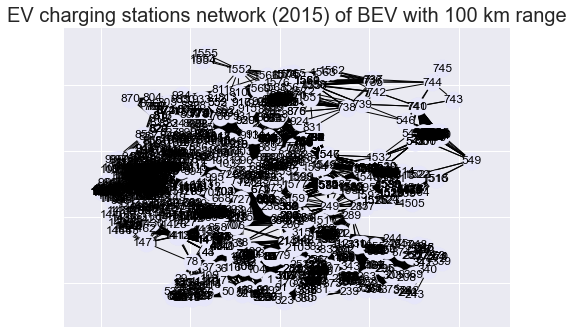

In [6]:
# ------------------------------- 2015 -------------------------------
print('Calculating 2015')
Gquindici=np.zeros((j,j))
weightsquindici=np.zeros((j,j))

for a in range (1,j):
    for b in range (1,j):
        #print("Questa a", a, "questa ist b", b)
        if a==b:
            Gquindici[a,b]=0
        else:
            dlon=radians(lgquindici[a]-lgquindici[b])
            dlat=radians(latquindici[a]-latquindici[b])
            aD = (sin(dlat/2))**2 + cos(radians(latquindici[a])) * cos(radians(latquindici[b])) * (sin(dlon/2))**2
            c = 2 * atan2(sqrt(aD), sqrt(1-aD))
            distance = R * c
            if distance<autonomia_auto: #3ßß*0.8
                Gquindici[a,b]=1
                weightsquindici[a,b]=distance

networkquindici=nx.Graph(Gquindici)
# adjadodici=nx.DiGraph(Gdodici)
mappingquindici = dict(zip(np.arange(0,j), np.arange(1,j+1)))

plt.clf()
plt.cla()

nx.draw_networkx(nx.relabel_nodes(networkquindici, mappingquindici), pos = posquindici, **options)

plt.title('EV charging stations network (2015) of BEV with 100 km range', fontsize=20)

# plt.savefig('../Exploratory_Analysis_Graphs/EVNetworkBEV2015.png')

In [7]:
#bb=nx.edge_betweenness_centrality(networkquindici, normalized=False)
dd=[]
nx.set_edge_attributes(networkdodici, dd, 'betweenness')
for a in range (1,i):
    for b in range (1,i):
        if Gdodici[a][b]==1:
            networkdodici[a][b]['betweenness']=weightsdodici[a,b]

In [8]:
#bb=nx.edge_betweenness_centrality(networkquindici, normalized=False)
bb=[]
nx.set_edge_attributes(networkquindici, bb, 'betweenness')
for a in range (1,j):
    for b in range (1,j):
        if Gquindici[a][b]==1:
            networkquindici[a][b]['betweenness']=weightsquindici[a,b]

In [9]:
print(i)
print(j)
print(k)

574
1599
23396


In [10]:
for a in range (1, i):
    for b in range (1, i):
        if Gdodici[a][b]==1:
            networkdodici[a][b]['weight']=weightsdodici[a,b]

In [11]:
print('Numero totale nodi: ', networkdodici.number_of_nodes())
print('Numero totale edge: ', networkdodici.number_of_edges())
for h in nx.connected_components(networkdodici):
        S=networkdodici.subgraph(h).copy()
        n=S.number_of_nodes()
        if n>4: 
            print('Number of nodes: ' + str(n))
            print('Diam=', nx.diameter(S))
            print('Avg shortest path=', nx.average_shortest_path_length(S))
            

Numero totale nodi:  574
Numero totale edge:  36322
Number of nodes: 568
Diam= 9
Avg shortest path= 3.732437836897931
Number of nodes: 5
Diam= 2
Avg shortest path= 1.1


In [21]:
print('Numero totale nodi: ', networkquindici.number_of_nodes())
print('Numero totale edge: ', networkquindici.number_of_edges())
for h in nx.connected_components(networkquindici):
        S=networkquindici.subgraph(h).copy()
        n=S.number_of_nodes()
        if n>4: 
            print('Number of nodes: ' + str(n))
            print('Diam=', nx.diameter(S))
            print('Avg shortest path=', nx.average_shortest_path_length(S))

Numero totale nodi:  1599
Numero totale edge:  153451
Number of nodes: 1598
Diam= 11
Avg shortest path= 3.9730384646431083


Calculating 2021


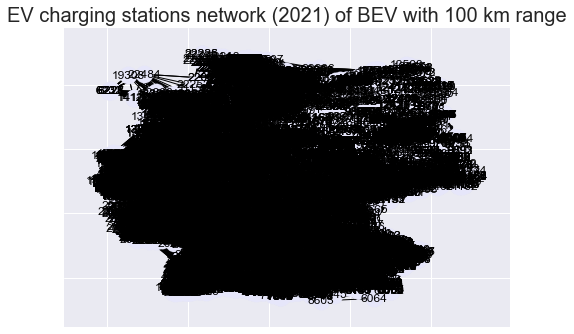

In [12]:
# ------------------------------- 2021 -------------------------------
print('Calculating 2021')
Gventuno=np.zeros((k,k))
weightsventuno=np.zeros((k,k))

for a in range (1,k):
    for b in range (1,k):
        #print("Questa a", a, "questa ist b", b)
        if a==b:
            Gventuno[a,b]=0
        else:
            dlon=radians(lgall[a]-lgall[b])
            dlat=radians(latall[a]-latall[b])
            aD = (sin(dlat/2))**2 + cos(radians(latall[a])) * cos(radians(latall[b])) * (sin(dlon/2))**2
            c = 2 * atan2(sqrt(aD), sqrt(1-aD))
            distance = R * c
            if distance<autonomia_auto: #3ßß*0.8
                Gventuno[a,b]=1
                weightsventuno[a,b]=distance

networkventuno=nx.Graph(Gventuno)
# adjadodici=nx.DiGraph(Gdodici)
mappingventuno = dict(zip(np.arange(0,k), np.arange(1,k+1)))

plt.clf()
plt.cla()

nx.draw_networkx(nx.relabel_nodes(networkventuno, mappingventuno), pos = posventuno, **options)
plt.title('EV charging stations network (2021) of BEV with 100 km range', fontsize=20)

plt.savefig('../Exploratory_Analysis_Graphs/EVNetworkBEV2021.png')

In [13]:
cc=[]
nx.set_edge_attributes(networkventuno, cc, 'betweenness')
for a in range (1,k):
    for b in range (a,k):
        if Gventuno[a][b]==1:
            networkventuno[a][b]['betweenness']=weightsventuno[a,b]

In [24]:
print('Numero totale nodi: ', networkventuno.number_of_nodes())
print('Numero totale edge: ', networkventuno.number_of_edges())
for h in nx.connected_components(networkventuno):
        S=networkventuno.subgraph(h).copy()
        n=S.number_of_nodes()
        if n>4: 
            print('Number of nodes: ' + str(n))
            print('Diam=', nx.diameter(S))
            print('Avg shortest path=', nx.average_shortest_path_length(S))

Numero totale nodi:  23396
Numero totale edge:  25739812
Number of nodes: 23395
Diam= 10
Avg shortest path= 3.6666618539728195


In [ ]:
avg_short_path21=3.6666618539728195

In [12]:
MunBerldodici=nx.dijkstra_path(networkdodici,source=Mundodici,target=Berldodici, weight='betweenness')
MunHambdodici=nx.dijkstra_path(networkdodici,source=Mundodici,target=Hambdodici, weight='betweenness')
MunDortdodici=nx.dijkstra_path(networkdodici,source=Mundodici,target=Dortdodici, weight='betweenness')

print(MunBerldodici)
print(nx.dijkstra_path_length(networkdodici,source=Mundodici,target=Berldodici, weight='betweenness'))
print(MunHambdodici)
print(nx.dijkstra_path_length(networkdodici,source=Mundodici,target=Hambdodici, weight='betweenness'))
print(MunDortdodici)
print(nx.dijkstra_path_length(networkdodici,source=Mundodici,target=Dortdodici, weight='betweenness'))

[36, 50, 28, 29, 562, 561, 154, 67]
509.2809794684413
[36, 50, 63, 42, 158]
283.4132920730255
[36, 50, 40, 169, 201, 293, 403]
448.89196474660315


In [13]:
MunBerlquindici=nx.dijkstra_path(networkquindici,source=Munquindici,target=Berlquindici, weight='betweenness')
MunHambquindici=nx.dijkstra_path(networkquindici,source=Munquindici,target=Hambquindici, weight='betweenness')
MunDortquindici=nx.dijkstra_path(networkquindici,source=Munquindici,target=Dortquindici, weight='betweenness')

print(MunBerlquindici)
print(MunHambquindici)
print(MunDortquindici)

[180, 342, 310, 288, 1592, 1493, 1518, 546, 387]
[180, 259, 320, 248, 1577, 1593, 760, 923, 560]
[180, 308, 382, 314, 383, 726, 1111, 1213]


In [14]:
MunBerlventuno=nx.dijkstra_path(networkventuno,source=Munventuno,target=Berlventuno, weight='betweenness')
MunHambventuno=nx.dijkstra_path(networkventuno,source=Munventuno,target=Hambventuno, weight='betweenness')
MunDortventuno=nx.dijkstra_path(networkventuno,source=Munventuno,target=Dortventuno, weight='betweenness')

print(MunBerlventuno)
print(MunHambventuno)
print(MunDortventuno)

[4886, 6884, 5727, 7630, 21552, 21231, 9897, 8723]
[4886, 6152, 8262, 5315, 7102, 23117, 23223, 12836, 13429, 10429, 10132]
[4886, 5650, 5747, 7174, 11816, 11369, 16259, 18174]


In [15]:
def calcdist(path, lgyear, latyear):
    distancetot = 0
    for i in range (0,len(path)-1):
        dlon=radians(lgyear[path[i]]-lgyear[path[i+1]])
        
        dlat=radians(latyear[path[i]]-latyear[path[i+1]])
        aD = (sin(dlat/2))**2 + cos(radians(latyear[path[i]])) * cos(radians(latyear[path[i+1]])) * (sin(dlon/2))**2
        c = 2 * atan2(sqrt(aD), sqrt(1-aD))
        distance = R * c
        distancetot=distancetot+distance
    return distancetot

In [16]:
print("Distance Munich-Berlin in 2012", calcdist(MunBerldodici,lgdodici, latdodici))
print("Distance Munich-Berlin in 2015", calcdist(MunBerlquindici, lgquindici, latquindici))
print("Distance Munich-Berlin in 2021", calcdist(MunBerlventuno, lgall, latall))

Distance Munich-Berlin in 2012 509.2809794684413
Distance Munich-Berlin in 2015 522.0523514066978
Distance Munich-Berlin in 2021 507.0226786571691


In [17]:
print("Distance Munich-Hamburg in 2012", calcdist(MunHambdodici,lgdodici, latdodici))
print("Distance Munich-Hamburg in 2015", calcdist(MunHambquindici, lgquindici, latquindici))
print("Distance Munich-Hamburg in 2021", calcdist(MunHambventuno, lgall, latall))

Distance Munich-Hamburg in 2012 283.4132920730255
Distance Munich-Hamburg in 2015 617.9621586103199
Distance Munich-Hamburg in 2021 609.7070114723733


In [18]:
print("Distance Munich-Dortmund in 2012", calcdist(MunDortdodici,lgdodici, latdodici))
print("Distance Munich-Dortmund in 2015", calcdist(MunDortquindici, lgquindici, latquindici))
print("Distance Munich-Dortmun in 2021", calcdist(MunDortventuno, lgall, latall))

Distance Munich-Dortmund in 2012 448.89196474660315
Distance Munich-Dortmund in 2015 486.86760574258216
Distance Munich-Dortmun in 2021 472.85588514506026


In [19]:
# date_cities_10

In [20]:
#print('Average clustering 2012:', nx.average_clustering(networkdodici, count_zeros=False))
#print('Average clustering 2015:', nx.average_clustering(networkquindici, count_zeros=False))
#print('Average clustering 2021:', nx.average_clustering(networkventuno))

def avg_clust(network):
    clust=nx.clustering(network)
    siz=0
    avg_clust=0
    for st, val in clust.items():
        avg_clust=avg_clust+val
        siz=siz+1

    return avg_clust/siz


In [63]:
print(avg_clust(networkdodici))
print(avg_clust(networkquindici))
print(avg_clust(networkventuno))

0.8376633694037675
0.801920209577915
0.7391072952326809


In [12]:
avg_custering_dodici=0.8376633694037675
avg_custering_quindici=0.801920209577915
avg_custering_ventuno=0.7391072952326809

In [21]:
def calcAvgShtPath(weight, size):
    avg_shrt=0
    for a in range (1,size):
        for b in range (1, size):
            avg_shrt=avg_shrt+weight[a,b]

    avg_shrt=avg_shrt/(size*(size-1))
    return avg_shrt


In [35]:
# print('Average shortest path 12:', calcAvgShtPath(weightsdodici, i))
# print('Average shortest path 15:', calcAvgShtPath(weightsquindici, j))
# print('Average shortest path 21:', calcAvgShtPath(weightsventuno, k))

Average shortest path 12: 10.519643593783487
Average shortest path 15: 6.13258443391434
Average shortest path 21: 5.5270134762096195


In [22]:
# avg_short_path12=10.519643593783487
# avg_short_path15=6.13258443391434
# avg_short_path21=5.5270134762096195

In [14]:
index12W=0
index12E=0

index15W=0
index15E=0

index21W=0
index21E=0

lg12W=[]
lg12E=[]
lat12W=[]
lat12E=[]
pos12W={}
pos12E={}

lg15W=[]
lg15E=[]
lat15W=[]
lat15E=[]
pos15W={}
pos15E={}

lg21W=[]
lg21E=[]
lat21W=[]
lat21E=[]
pos21W={}
pos21E={}

for lat, lng, temp, state in zip(df_mobility['latitude_[dg]'], df_mobility['longitude_[dg]'], df_mobility['commissioning_date'], df_mobility['federal_state']):
    t1=datetime.strptime(str(temp), "%Y-%m-%d %H:%M:%S")
    if t1.year<2013:
        if state=='Berlin' or state=='Brandenburg' or state=='Mecklenburg-Vorpommern' or state=='Sachsen' or state=='Sachsen-Anhalt' or state=='Thüringen':
            index12E=index12E+1
            lat12E.append(lat)
            lg12E.append(lng)
            pos12E[index12E]=(lng,lat)
        else:
            index12W=index12W+1
            lat12W.append(lat)
            lg12W.append(lng)
            pos12W[index12W]=(lng,lat)

    if t1.year<2016:
        if state=='Berlin' or state=='Brandenburg' or state=='Mecklenburg-Vorpommern' or state=='Sachsen' or state=='Sachsen-Anhalt' or state=='Thüringen':
            index15E=index15E+1
            lat15E.append(lat)
            lg15E.append(lng)
            pos15E[index15E]=(lng,lat)
        else:
            index15W=index15W+1
            lat15W.append(lat)
            lg15W.append(lng)
            pos15W[index15W]=(lng,lat)


    if t1.year<2022:
        if state=='Berlin' or state=='Brandenburg' or state=='Mecklenburg-Vorpommern' or state=='Sachsen' or state=='Sachsen-Anhalt' or state=='Thüringen':
            index21E=index21E+1
            lat21E.append(lat)
            lg21E.append(lng)
            pos21E[index21E]=(lng,lat)
        else:
            index21W=index21W+1
            lat21W.append(lat)
            lg21W.append(lng)
            pos21W[index21W]=(lng,lat)



In [15]:
print(index12E)
print(index12W)


114
460


In [16]:
def generateNetwork(size, lg, lat):
    Gnet=np.zeros((size,size))
    weight=np.zeros((size,size))

    for a in range (1,size):
        for b in range (1,size):
            #print("Questa a", a, "questa ist b", b)
            if a==b:
                Gnet[a,b]=0
            else:
                dlon=radians(lg[a]-lg[b])
                dlat=radians(lat[a]-lat[b])
                aD = (sin(dlat/2))**2 + cos(radians(lat[a])) * cos(radians(lat[b])) * (sin(dlon/2))**2
                c = 2 * atan2(sqrt(aD), sqrt(1-aD))
                distance = R * c
                if distance<autonomia_auto: #3ßß*0.8
                    Gnet[a,b]=1
                    weight[a,b]=distance

    network=nx.Graph(Gnet)
    # adjadodici=nx.DiGraph(Gdodici)
    mapping = dict(zip(np.arange(0,size), np.arange(1,size+1)))

    return Gnet, weight, network, mapping

Calculating 2012 West and East


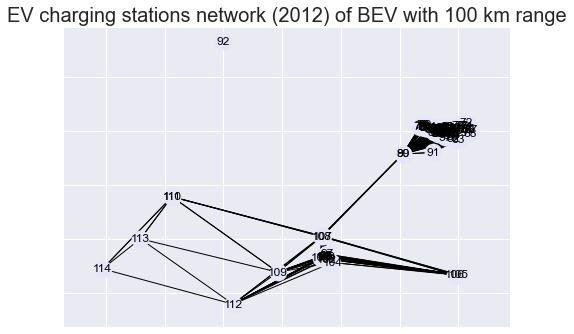

In [17]:
print('Calculating 2012 West and East')
[G12W, weight12W, network12W, mapping12W]=generateNetwork(index12W, lg12W, lat12W)
[G12E, weight12E, network12E, mapping12E]=generateNetwork(index12E, lg12E, lat12E)

plt.clf()
plt.cla()

nx.draw_networkx(nx.relabel_nodes(network12W, mapping12W), pos = pos12W, **options)
plt.title('EV charging stations network (2012) of BEV with 100 km range', fontsize=20)

plt.savefig('../Exploratory_Analysis_Graphs/EVNetworkBEV2012West.png')

plt.clf()
plt.cla()

nx.draw_networkx(nx.relabel_nodes(network12E, mapping12E), pos = pos12E, **options)
plt.title('EV charging stations network (2012) of BEV with 100 km range', fontsize=20)

plt.savefig('../Exploratory_Analysis_Graphs/EVNetworkBEV2012East.png')

Calculating 2015 West and East


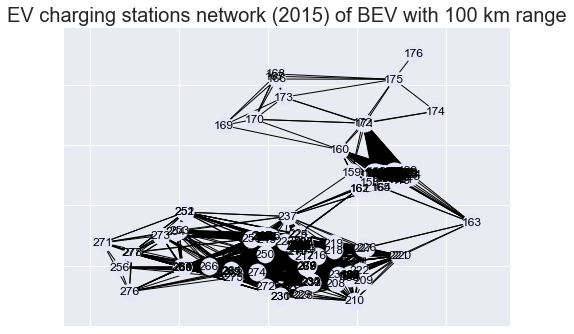

In [18]:
print('Calculating 2015 West and East')
[G15W, weight15W, network15W, mapping15W]=generateNetwork(index15W, lg15W, lat15W)
[G15E, weight15E, network15E, mapping15E]=generateNetwork(index15E, lg15E, lat15E)

plt.clf()
plt.cla()

nx.draw_networkx(nx.relabel_nodes(network15W, mapping15W), pos = pos15W, **options)
plt.title('EV charging stations network (2015) of BEV with 100 km range', fontsize=20)

plt.savefig('../Exploratory_Analysis_Graphs/EVNetworkBEV2015West.png')

plt.clf()
plt.cla()

nx.draw_networkx(nx.relabel_nodes(network15E, mapping15E), pos = pos15E, **options)
plt.title('EV charging stations network (2015) of BEV with 100 km range', fontsize=20)

plt.savefig('../Exploratory_Analysis_Graphs/EVNetworkBEV2015East.png')

Calculating 2021 West


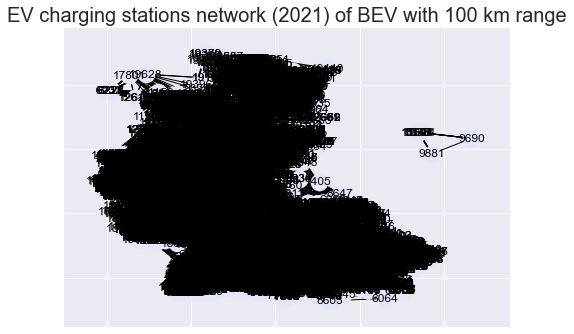

In [19]:
print('Calculating 2021 West')
[G21W, weight21W, network21W, mapping21W]=generateNetwork(index21W, lg21W, lat21W)

plt.clf()
plt.cla()

nx.draw_networkx(nx.relabel_nodes(network21W, mapping21W), pos = pos21W, **options)
plt.title('EV charging stations network (2021) of BEV with 100 km range', fontsize=20)

plt.savefig('../Exploratory_Analysis_Graphs/EVNetworkBEV2021West.png')



Calculating 2021 East


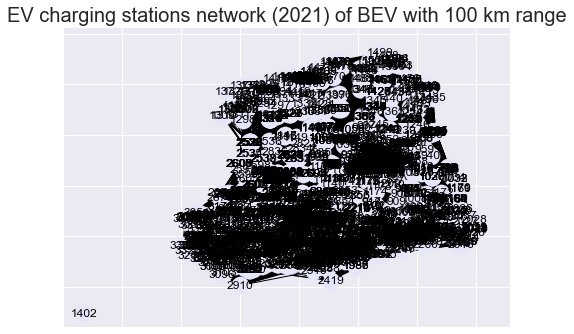

In [20]:
print('Calculating 2021 East')
[G21E, weight21E, network21E, mapping21E]=generateNetwork(index21E, lg21E, lat21E)

plt.clf()
plt.cla()

nx.draw_networkx(nx.relabel_nodes(network21E, mapping21E), pos = pos21E, **options)
plt.title('EV charging stations network (2021) of BEV with 100 km range', fontsize=20)

plt.savefig('../Exploratory_Analysis_Graphs/EVNetworkBEV2021East.png')

In [13]:
for h in nx.connected_components(network21W):
        S=network21W.subgraph(h).copy()
        n=S.number_of_nodes()
        if n>4: 
            print('Number of nodes: ' + str(n))
            print('Avg shortest path=', nx.average_shortest_path_length(S))

Number of nodes: 20044
Avg shortest path= 3.4946522828642426
Number of nodes: 7
Avg shortest path= 1.0


In [14]:
avg_short_path12E=1.6414092664092663
avg_short_path12W=2.6316674932656494
avg_short_path15E=2.1202061424161567
avg_short_path15W=3.5313919014842026
avg_short_path21E=2.1051328801924334
avg_short_path21W=3.4946522828642426

In [12]:
for h in nx.connected_components(network12E):
        S=network12E.subgraph(h).copy()
        n=S.number_of_nodes()
        if n>4: 
            print('Number of nodes: ' + str(n))
            print('Small worldness=', nx.sigma(S))

Number of nodes: 112


In [22]:
print('12E')
print(index12E)
print(np.sum(G12E))

print('12W')
print(index12W)
print(np.sum(G12W))

print('15E')
print(index15E)
print(np.sum(G15E))

print('15W')
print(index15W)
print(np.sum(G15W))

print('21E')
print(index21E)
print(np.sum(G21E))

print('21W')
print(index21W)
print(np.sum(G21W))


12E
114
8346.0
12W
460
64032.0
15E
278
34722.0
15W
1321
269582.0
21E
3344
3184996.0
21W
20052
47395530.0


In [21]:
# set weight
def setweights(Gnet, network, weight, size):
    cc=[]
    nx.set_edge_attributes(network, cc, 'betweenness')
    for a in range (1,size):
        for b in range (1,size):
            if Gnet[a][b]==1:
                network[a][b]['betweenness']=weight[a,b]
    return network

In [22]:
network12E=setweights(G12E, network12E, weight12E, index12E)
network12W=setweights(G12W, network12W, weight12W, index12W)

network15E=setweights(G15E, network15E, weight15E, index15E)
network15W=setweights(G15W, network15W, weight15W, index15W)

network21E=setweights(G21E, network21E, weight21E, index21E)
network21W=setweights(G21W, network21W, weight21W, index21W)

In [23]:
networkdodici=setweights(Gdodici, networkdodici, weightsdodici, i)
networkquindici=setweights(Gquindici, networkquindici, weightsquindici, j)
networkventuno=setweights(Gventuno, networkventuno, weightsventuno, k)

In [35]:
# print('Average shortest path 12W:', calcAvgShtPath(weight12W, index12W))
# print('Average shortest path 12E:', calcAvgShtPath(weight12E, index12E))

Average shortest path 12W: 15.886911422470996
Average shortest path 12E: 7.572502415854596


In [38]:
# avg_short_path12W=15.886911422470996
# avg_short_path12E=7.572502415854596

In [36]:
# print('Average shortest path 15W:', calcAvgShtPath(weight15W, index15W))
# print('Average shortest path 15E:', calcAvgShtPath(weight15E, index15E))

Average shortest path 15W: 8.471488096173008
Average shortest path 15E: 9.687302228114097


In [39]:
# avg_short_path15W=8.471488096173008
# avg_short_path15E=9.687302228114097

In [37]:
# print('Average shortest path 21W:', calcAvgShtPath(weight21W, index21W))
# print('Average shortest path 21E:', calcAvgShtPath(weight21E, index21E))

Average shortest path 21W: 6.96909098366085
Average shortest path 21E: 13.946351175418995


In [40]:
# avg_short_path21W=6.96909098366085
# avg_short_path21E=13.946351175418995

In [41]:
# print(avg_clust(network12W))
# print(avg_clust(network12E))

0.8059432916191623
0.9571908813007884


In [42]:
avg_clust12W=0.8059432916191623
avg_clust12E=0.9571908813007884

In [43]:
# print(avg_clust(network15W))
# print(avg_clust(network15E))

0.7809733295976268
0.935465635772212


In [44]:
avg_clust15W=0.7809733295976268
avg_clust15E=0.935465635772212

In [61]:
# print(avg_clust(network21W))
# print(avg_clust(network21E))

0.7422879645415326


In [48]:
avg_clust21E=0.8175138495149545
avg_clust21W=0.7422879645415326

In [16]:
def sigma2(G, niter=100, nrand=10, seed=None, avgshort=1.0):
    """Returns the small-world coefficient (sigma) of the given graph.

    The small-world coefficient is defined as:
    sigma = C/Cr / L/Lr
    where C and L are respectively the average clustering coefficient and
    average shortest path length of G. Cr and Lr are respectively the average
    clustering coefficient and average shortest path length of an equivalent
    random graph.

    A graph is commonly classified as small-world if sigma>1.

    Parameters
    ----------
    G : NetworkX graph
        An undirected graph.
    niter : integer (optional, default=100)
        Approximate number of rewiring per edge to compute the equivalent
        random graph.
    nrand : integer (optional, default=10)
        Number of random graphs generated to compute the average clustering
        coefficient (Cr) and average shortest path length (Lr).
    seed : integer, random_state, or None (default)
        Indicator of random number generation state.
        See :ref:`Randomness<randomness>`.

    Returns
    -------
    sigma : float
        The small-world coefficient of G.

    Notes
    -----
    The implementation is adapted from Humphries et al. [1]_ [2]_.

    References
    ----------
    .. [1] The brainstem reticular formation is a small-world, not scale-free,
           network M. D. Humphries, K. Gurney and T. J. Prescott,
           Proc. Roy. Soc. B 2006 273, 503-511, doi:10.1098/rspb.2005.3354.
    .. [2] Humphries and Gurney (2008).
           "Network 'Small-World-Ness': A Quantitative Method for Determining
           Canonical Network Equivalence".
           PLoS One. 3 (4). PMID 18446219. doi:10.1371/journal.pone.0002051.
    """
    import numpy as np

    # Compute the mean clustering coefficient and average shortest path length
    # for an equivalent random graph
    randMetrics = {"C": [], "L": []}
    for i in range(nrand):
        print("Nel for:", i)
        Gr = nx.random_reference(G, niter=niter, seed=seed)
        print("After random ref")
        randMetrics["C"].append(nx.transitivity(Gr))
        randMetrics["L"].append(nx.average_shortest_path_length(Gr))

    print('fuori for')
    C = nx.transitivity(G)
    print('after transitivity')
    L = avgshort
    Cr = np.mean(randMetrics["C"])
    Lr = np.mean(randMetrics["L"])

    sigma = (C / Cr) / (L / Lr)

    return sigma

In [17]:
for h in nx.connected_components(network12E):
        S=network12E.subgraph(h).copy()
        n=S.number_of_nodes()
        if n>4: 
            print('Number of nodes: ' + str(n))
            print('Small worldness=', sigma2(S, nrand=3, avgshort=avg_short_path15E))

Number of nodes: 112
Nel for: 0
After random ref
Nel for: 1
After random ref
Nel for: 2
After random ref
fuori for
after transitivity
Small worldness= 0.7018840942855582


In [60]:


print('omega 12E')
print(sigma2(network12E,avgshort=avg_short_path12E))
print('omega 12W')
print(sigma2(network12W,avgshort=avg_short_path12W))

print('omega 15E')
print(sigma2(network15E,avgshort=avg_short_path15E))
print('omega 15W')
print(sigma2(network15W,avgshort=avg_short_path15W))

print('omega 21E')
print(sigma2(network21E,avgshort=avg_short_path21E))
print('omega 21W')
print(sigma2(network21W,avgshort=avg_short_path21W))

print('average clustering west 21')
print(avg_clust(network21W))


omega 12E


KeyboardInterrupt: 

In [84]:
g1122E=pd.DataFrame(G12E)
g1122W=pd.DataFrame(G12W)

ww1122E=pd.DataFrame(weight12E)
ww1122W=pd.DataFrame(weight12W)

g1122E.to_csv('G12E.csv')
g1122W.to_csv('G12W.csv')
ww1122E.to_csv('weight12E.csv')
ww1122W.to_csv('weight12W.csv')

In [85]:
g1155E=pd.DataFrame(G15E)
g1155W=pd.DataFrame(G15W)

ww1155E=pd.DataFrame(weight15E)
ww1155W=pd.DataFrame(weight15W)

g1155E.to_csv('G15E.csv')
g1155W.to_csv('G15W.csv')
ww1155E.to_csv('weight15E.csv')
ww1155W.to_csv('weight15W.csv')

In [86]:
g112121E=pd.DataFrame(G21E)
g112121W=pd.DataFrame(G21W)

ww112121E=pd.DataFrame(weight21E)
ww112121W=pd.DataFrame(weight21W)

g112121E.to_csv('G21E.csv')
g112121W.to_csv('G21W.csv')
ww112121E.to_csv('weight21E.csv')
ww112121W.to_csv('weight21W.csv')

In [65]:
networkdodici[73][74]['weight']=weightsdodici[73][74]

In [80]:
def calcSmall(G):
    for h in nx.connected_components(G):
        S=G.subgraph(h).copy()
        n=S.number_of_nodes()
        if n>4: 
            print('Number of nodes: ' + str(n))
            print('Small=' +str(nx.algorithms.smallworld.sigma(S, niter=1, nrand=3)))

In [81]:
# for a in range (1,index12E):
#     for b in range (1, index12E):
#         network12E[a][b]['weight']=weight12E[a][b]

In [82]:
print('12E')
calcSmall(network12E)

# Small=0.9069282908447996

12E
Number of nodes: 112
Small=0.9069282908447996


In [87]:
print('12W')
calcSmall(network12W)

print('15E')
calcSmall(network15E)

print('15W')
calcSmall(network15W)

print('21E')
calcSmall(network21E)

print('21W')
calcSmall(network21W)

12W
Number of nodes: 454


KeyboardInterrupt: 

In [18]:
for a in range (1,index12E):
        for b in range (1,index12E):
            if G12E[a][b]==1:
                network12E[a][b]['weight']=weight12E[a,b]

In [19]:
for h in nx.connected_components(network12E):
        S=network12E.subgraph(h).copy()
        n=S.number_of_nodes()
        if n>4: 
            print('Number of nodes: ' + str(n))
            print('Diam=', nx.diameter(S))

Number of nodes: 112
Diam= 4


In [23]:
for h in nx.connected_components(network21E):
        S=network21E.subgraph(h).copy()
        n=S.number_of_nodes()
        if n>4: 
            print('Number of nodes: ' + str(n))
            print('Diam=', nx.diameter(S))

print('il 21 W')

for h in nx.connected_components(network21W):
        S=network21W.subgraph(h).copy()
        n=S.number_of_nodes()
        if n>4: 
            print('Number of nodes: ' + str(n))
            print('Diam=', nx.diameter(S))


# print(nx.diameter(network21E))

Number of nodes: 3342
Diam= 6
il 21 W
Number of nodes: 20044
Diam= 10
Number of nodes: 7
Diam= 1


In [32]:
for h in nx.connected_components(networkventuno):
        S=networkventuno.subgraph(h).copy()
        n=S.number_of_nodes()
        if n>4: 
            print('Number of nodes: ' + str(n))
            print('Diam=', sum(nx.degree_centrality(S).values())/float(len(nx.degree_centrality(S))))

Number of nodes: 23395
Diam= 0.0940606187110783


In [33]:
degree_centraly_12E=0.671332046332046
degree_centraly_12W=0.31125827814569573

degree_centraly_15E=0.45416732067179255
degree_centraly_15W=0.15507103486915247

degree_centraly_21E=0.2852502081836558
degree_centraly_21W=0.11797497085516664

degree_centraly_12=0.22550736517872638
degree_centraly_15=0.12025912164783323
degree_centraly_21=0.0940606187110783